# Assignment 8 (Nov 8)

Today's topics are:

1. Installing packages from source code
2. Python scripts, modules and packages
3. Real (exo)world MCMC example


## Installing from source

Last time we saw how to install new Python packages form the internet with `conda` and `pip`, but sometimes we need to install packages directly from their source code.

As always, first check the official documentation for the package you want to use and try their recommended installation instructions!

Installing from the source code is done for 3 primary reasons:

1. The code isn't yet available on the Python Package Index ([PyPI](https://pypi.org)).
2. The code has complicated dependencies that cannot be easily installed by `pip` or `conda` alone.
3. You are contributing to the source code of an open source project.

Before getting into the details of installing from source, we'll take a detour through python **scripts**, **modules**, and **packages**.

## Python scripts, modules and packages

We have spent most of the term using only Jupyter Notebooks (`.ipynb`), but it's important to understand when to use `.py` files as well.

Jupyter notebooks are convenient for quick data analysis / plotting code, but using pure `.py` files is an important part of any Python project. We want to use `.py` files because:

- They can keep our larger projects organized
- We can re-use code in a `.py` file much easier than in a `.ipynb` notebook
- We can run code in a `.py` directly from the terminal (useful for cloud / cluster computing)

A `.py` file can be one of two main types which differ in their goals for organizing and running our code. These types are the **Python script** and **Python module**.

### Python scripts

A Python script is a file meant to be run from top to bottom to produce a certain effect or output. Scripts we typically want to run from the terminal with a `python` command like:

`python run_program.py`

All of the code necessary to perform a task is contained within the script and the program stops after it has run all of its code. For example, say the following file is called `quadratic.py`:

```Python
"""Plot a quadratic function with errors."""
import numpy as np
import matplotlib.pyplot as plt

def quadratic_errors(x, err=10):
    """Return quadratic in x with err."""
    y = (x + np.random.randint(0, 10, 100))**2
    return y

if __name__ == '__main__':
    x = np.arange(100)
    y = quadratic_errors(x)
    plt.plot(x, y)
    plt.savefig('quadratic_with_errors.png')
```

We could run it from the terminal with:

`python quadratic.py`

Note that the script has a docstring at the top of the file describing what it does.

Also, our code uses `savefig` to export an image of our plot since we won't have a nice notebook interface to preserve our figures. Make sure you save the data or plots you need when working with a script!

The `if __name__ == '__main__':` block indicates the parts of the script which you want to be run **only** when the script is called directly.

If we instead want to import the `quadratic` function to use elsewhere, we can do so from another file with:

`from quadratic import quadratic_errors`

Because we have the `__name__ == '__main__'`, our plotting code doesn't get run when we import `quadratic` from this file. This means we can use this file as a **module**.

### Python modules

A Python module is a collection of **functions** or **classes** that we intend to use from other programs or notebooks.

This is simple to do if your notebook or other code file is in the same directory as your module. Like above, simply use the `import` command which we have seen constantly throughout this course. Any of the following will work on our `quadratic.py` file:

```Python
# Import the module
import quadratic
quadratic.quadratic_errors(x)

# Import the module as an alias
import quadratic as quad
quad.quadratic_errors(x)

# Import the function directly
from quadratic import quadratic_errors
quadratic_errors(x)
```

Modules are very useful because we can use them to group and keep track of code that we want to re-use or use from a variety of projects. 

For example, if we have several projects that all need the `quadratic_errors` function, we **don't** want to copy and past the function definition into every file (see [3.1 Python Style](https://cjtu.github.io/spirl/python_style.html)). Instead, we can put our `quadratic_errors` into the `quadratic.py` file we described above and simple import it from the different projects with one of the import statements above. This makes it so that if we ever need to update `quadratic_errors`, we only need to do it in **one place** and can immediate use the changes from all of our projects.

So far, `import` statements will only work on local code that is in the same directory, or code that is installed, e.g. with `pip` or `conda`. This is because Python actually has a list of directories it checks whenever you try to `import` from another place. This list of directories is called the **PYTHONPATH** and there is a different **PYTHONPATH** for each of your `conda` environments.

To add a module to our **PYTHONPATH** to allow us to import it from anywhere on our computer, we first need to put that module into a **package**


### Python packages

Python recognizes packages with a special file outside of the modules called `__init__.py`. For example, if you want to have the modules `linear`, `quadratic`, and `cubic`, you would set up your directory like:

```
| my_modules
|---- __init__.py
|---- cubic.py
|---- linear.py
|---- quadratic.py
```

Here, the `__init__.py` can be completely blank! It just acts as a signifier to Python that there are modules in this folder. The outer folder, `my_modules` is then recognized as the **package**, and can be referred to in an `import` statement like so:

```Python
# Import the module
from my_modules import quadratic
quadratic.quadratic_errors(x)

# Import the module as an alias
from my_modules import quadratic as quad
quad.quadratic_errors(x)

# Import the function directly
from my_modules.quadratic import quadratic_errors
quadratic_errors(x)
```

The last thing we need to make a local Python package installable (have it added to our path to use it from anywhere) is to add a `setup.py` file.

The most basic `setup.py` contains:

```Python
from setuptools import setup, find_packages

setup(
    name='MyPackageName',
    version='1.0.0',
    author='Author Name',
    author_email='author@gmail.com',
    description='Description of my package',
    packages=find_packages(),    
    install_requires=[
        'numpy >= 1.11.1', 
        'matplotlib >= 1.5.1',
        'other_package >= v.x.y,
    ],
)
```

The `setup.py` file contains the metadata needed for Python packages. Although there are several newer ways to setup Python packages (e.g., `setup.cfg`, `pyproject.toml`), packaging is a deep topic and we can stick to `setup.py` for now.

Now you have everything you need to install your local source code!

## Installing from source

The two main way to install from source are:

- Normal package install
- Install packing in **developer** mode

To install a local package normally (e.g., how `pip` and `conda` install packages from the internet), you can run any of the following from the root package directory (the folder with `setup.py`) in the terminal:

```
python setup.py install
pip install .
python -m pip install .
```

This will install the version of the source code *as it was when you ran the command*. The three commands are mostly interchangeable (make sure to refer to the official documentation to see if one of the 3 is recommended over the others).

If you edit your package (change any code or functions in the modules), you will **NOT** be able to use these changes with a normally installed package without re-installing or using `pip install` again to install the *updated* package.

To install a package in **developer** or **editable** mode, you can run any of the following from the package directory:

```
python setup.py develop
pip install -e .
python -m pip install -e .
```

This way, if you add new functions or edit existing ones in your modules, you will be able to use those changes without running `pip install` again.

Rule of thumb:

If you are installing a package from the internet that you want to use **as is** and will not be editing any of the source code, use the "normal" install (e.g. `python setup.py install`).

If you are installing a local package that you want to use elsewhere, or installing another person's package to tinker with / contribute to the source code, use the `develop` / `-e` mode.

Final note: These instructions are for installing local packages. If you find a Python package on GitHub you'd like to use, you will likely first need to **fork** and then **clone** the repository and then run one of the install commands above.

## The `exoplanet` MCMC package

The `exoplanet` package is a tool for identifying exoplanets from radial velocity (RV) data. It can be installed from `conda` or `pip`, but in class today we will demonstrate how to install a package from source and encourage you to give it a try on `exoplanet` for the homework. The official documentation is quite informative and available [here](https://docs.exoplanet.codes/en/latest/). The GitHub repository is available [here](https://github.com/exoplanet-dev/exoplanet).

## [Assignment]

This assignment builds on the concepts we've learned so far. The instructions are simple so you can explore a little more naturally. Feel free to refer to previous assignments, the SPIRL textbook, or ask questions on the `#help` channel on Slack!

You will need to:

- Clone the `exoplanet` package from GitHub
- Install the local `exoplanet` package from source 
- Work through the `exoplanet` tutorial [here](https://docs.exoplanet.codes/en/latest/tutorials/intro-to-pymc3/) on your local computer
- Discover a new exoplanet using a different light curve
  - We will use the RV for HD 209458 (see more [here](https://exoplanetarchive.ipac.caltech.edu/overview/HD%20209458%20b#planet_HD-209458-b_collapsible))
  - To do so, change the download `url` line to: `url = “https://exoplanetarchive.ipac.caltech.edu/data/ExoData/0108/0108859/data/UID_0108859_RVC_001.tbl”`
  - Update the published literature period line to `lit_period = 3.52474859`
  - Update the K prior to the uniform prior $U(0, 200)$
  - Update the P prior to the uniform prior $U(0, 5)$
- Copy and paste your notebook code to a script (`.py` file)
  - Don't forget to wrap everything other than the `import` or function `def` lines in `if __name__ == '__main__':`
- Save the main corner plot and final fit plots using `plt.savefig`
- Run the script from the terminal

Please submit in your Pull Request your modified tutorial notebook, Python script, and any plots generated by your script.

**BONUS**:

To take this 1 step further, you can create a module that runs the `exoplanet` MCMC analysis and do the plotting in Jupyter. 

- Make a new `.py` file
- Make a Python function that runs the MCMC analysis from the script
  - Make sure the function returns `trace`, `map_params`, and anything else you need for the plots 
- From a new Jupyter notebook, import your MCMC function from your `.py` file
- Run the MCMC code cell and make the requested plots in the Jupyter notebook

Clearly name the new module and Jupyter notebook and include them in your PR.

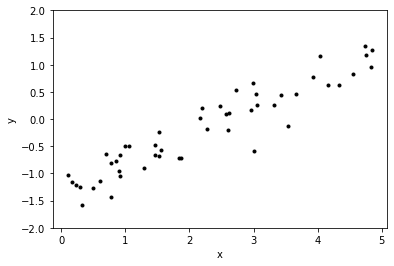

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

true_m = 0.5
true_b = -1.3
true_logs = np.log(0.3)

x = np.sort(np.random.uniform(0, 5, 50))
y = true_b + true_m * x + np.exp(true_logs) * np.random.randn(len(x))

plt.plot(x, y, ".k")
plt.ylim(-2, 2)
plt.xlabel("x")
_ = plt.ylabel("y")

In [3]:
import pymc3 as pm

with pm.Model() as model:

    # Define the priors on each parameter:
    m = pm.Uniform("m", lower=-5, upper=5)
    b = pm.Uniform("b", lower=-5, upper=5)
    logs = pm.Uniform("logs", lower=-5, upper=5)

    # Define the likelihood. A few comments:
    #  1. For mathematical operations like "exp", you can't use
    #     numpy. Instead, use the mathematical operations defined
    #     in "pm.math".
    #  2. To condition on data, you use the "observed" keyword
    #     argument to any distribution. In this case, we want to
    #     use the "Normal" distribution (look up the docs for
    #     this).
    pm.Normal("obs", mu=m * x + b, sd=pm.math.exp(logs), observed=y)

    # This is how you will sample the model. Take a look at the
    # docs to see that other parameters that are available.
    trace = pm.sample(
        draws=1000, tune=1000, chains=2, cores=2, return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [logs, b, m]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.


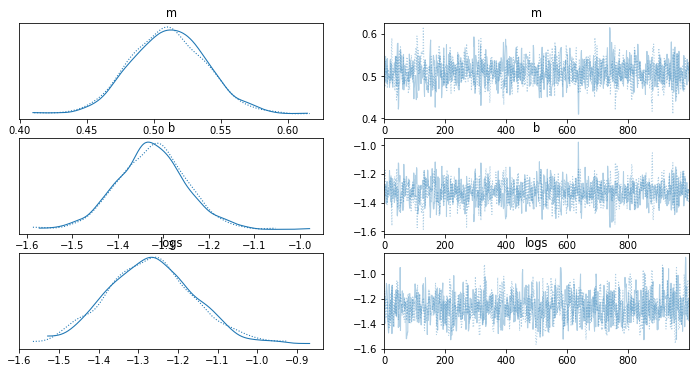

In [4]:
import arviz as az

_ = az.plot_trace(trace, var_names=["m", "b", "logs"])

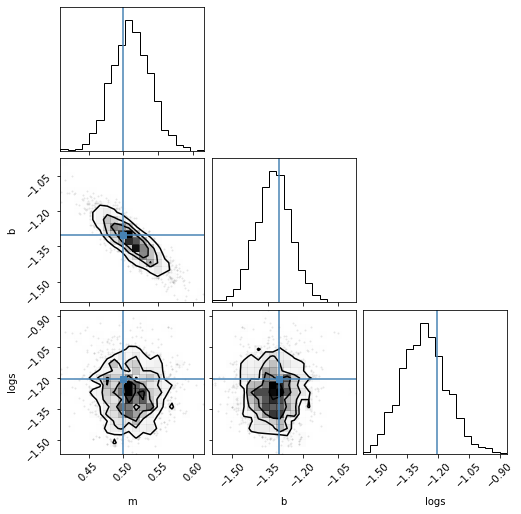

In [5]:
import corner

_ = corner.corner(
    trace,
    truths=dict(m=true_m, b=true_b, logs=true_logs),
)